In [1]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()
import os

In [3]:
GROQ_API_KEY=os.getenv("GROQ_API_KEY")

In [4]:
model=ChatGroq(model="llama3-70b-8192",api_key=GROQ_API_KEY)

In [5]:
#create state

class Blogstate(TypedDict):
    title :str
    outline:str
    content:str


In [6]:
def create_outline(state:Blogstate)->Blogstate:
    title=state['title']

    prompt=f"Ganarte a outline for a blog on the topic -{title}"

    state['outline']=model.invoke(prompt).content


    return state

In [7]:
def craete_blog(state:Blogstate)->Blogstate:
    title=state['title']
    outline=state['outline']

    prompt=f'write a deteailed blog on the title {title} using the following outline-{outline}'

    state['content']=model.invoke(prompt).content

    return state

In [8]:
#create a graph
graph=StateGraph(Blogstate)

#create a node
graph.add_node("create_outline",create_outline)
graph.add_node("craete_blog",craete_blog)

#add edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','craete_blog')
graph.add_edge('craete_blog',END)

#compile the graph

workflow=graph.compile()

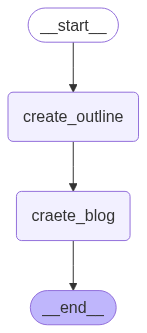

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
initial_state={"title":"rise in AI in india"}

final_out=workflow.invoke(initial_state)

print(final_out['outline'])


Here is a suggested outline for a blog on the topic "Rise of AI in India":

**I. Introduction**

* Brief overview of AI and its growing importance globally
* Importance of AI in India's economic growth and development
* Thesis statement: India is witnessing a significant rise in AI adoption, with both the government and private sector investing heavily in AI research and development.

**II. Government Initiatives**

* Overview of Indian government's AI-related initiatives, such as:
	+ National Strategy for Artificial Intelligence (NSAI)
	+ AI for All initiative
	+ Setting up of AI research centers and institutes
* Discussion of government's efforts to create an AI ecosystem in India

**III. AI Adoption in Various Industries**

* Overview of AI adoption in various industries in India, such as:
	+ Healthcare: AI-powered diagnosis, telemedicine, and personalized medicine
	+ Finance: AI-powered chatbots, fraud detection, and credit scoring
	+ Education: AI-powered learning platforms, adapt

In [13]:
print(final_out['content'])

Here is a detailed blog on the rise of AI in India based on the provided outline:

**I. Introduction**

Artificial intelligence (AI) has been transforming the world at an unprecedented pace. From virtual assistants to self-driving cars, AI has become an integral part of our daily lives. India, in particular, has been witnessing a significant rise in AI adoption, with both the government and private sector investing heavily in AI research and development. In this blog, we will explore the rise of AI in India, its applications across various industries, and the challenges that lie ahead.

**II. Government Initiatives**

The Indian government has been at the forefront of promoting AI adoption in the country. In 2018, the government launched the National Strategy for Artificial Intelligence (NSAI), which aims to position India as a leader in AI research and development. The NSAI has identified five core areas for AI development: healthcare, education, infrastructure, transportation, and cy